# Eroding Landscapes Assessment

Written by Simon M Mudd last update 05/10/2022

In this assessment you will look at some real landscapes and extract the apparent "erodibility" (*K* in the stream power equation) from them. You will do this by measuring the basin length and the relief of the catchment. 

Once you have the *K* values, you will plug these values into a channel evolution model to see how a real channel might respond to changes in uplift rates. 

From there you will look at the rate of knickpoint retreat and the time it takes the channels to reach a new steady state. 

You will then write a short report, including figures, about your findings. The style of the figures and the writing should be similar to your essay, so feedback from this report can be used to improve your essay. 

## Learning objectives

 * You will practise extracting data from online map resources and an erosion rate database.
 * You will use real world data to tune a model (the model has been provided in these notebooks). 
 * You will then use values in your tuned model to explore landscape response to changing uplift. 
 * You will practise writing scientifically and preparing figures. 

## Some preliminary python stuff

In [1]:
!pip install channeltoy
%matplotlib inline
import channeltoy as ct
import matplotlib.pyplot as plt
import numpy as np

## Assessment tasks

### Part 1: Extracting *K* values from real landscapes

* You will need a combination of Google Earth and this website: https://earth.uow.edu.au/ 
* On the https://earth.uow.edu.au/ website, there is a "layers" tab (looks like stacked papers) on the left. Click on this and select the the "CRN Denudation, global collection, river basins" layer. 
    * Find a mountain range you like that has a basin. 
    * Click on the basin: it will have an erosion rate in mm/kyr. Divide by 1000000 to get the erosion rate in m/yr. So 1000 mm/kyr will be 0.001 m/yr. You will want a large basin because small basins will have noisier data. Write this number down. 
* Now go onto google earth and find the length of the basin and its relief (measure the distance from the outlet to the most distant channel, and to get the relief subtract the elevation of the farthest channel from the elevation of the outlet). 

Use the second box below (it has some python code) to change values of *K* until you get the right relief. **You just need the relief to be correct to within a few percent...don't try to match 2 significant digits!!!**

**You need to do this for several basins (up to 10, no less than 4).**

In [2]:
# DO NOT CHANGE ANYTHING IN THIS BOX
# This function defines the plotting
plt.rcParams['figure.figsize'] = [10, 5]
def plot_channel_SS(K = 0.00005, initial_U = 0.0002, basin_length = 10000 ):
    """Remove old lines from plot and plot new one"""

    chan = ct.channeltoy(spacing=250, U = initial_U, K = K, n=1, m= 0.45, maximum_x = basin_length-999, X_0 = basin_length)
    initial_elevation = chan.solve_steady_state_elevation()
    x = chan.x_data
    chi = chan.chi_data
    relief = np.max(initial_elevation)

    fig, ax = plt.subplots()
    plt.plot(x, initial_elevation,label="Initial elevation")
    plt.xlabel("Distance from outlet (m)")
    plt.ylabel("Elevation (m)")
    plt.title("Erosion = "+str(initial_U*1000)+" mm/yr, K = "+str(K)+" and relief = "+str(np.round(relief,2))+" m")
    #ax.set_ylim([0, 200])
    plt.legend()
    
    return relief

K is: 5e-05
U is: 0.0002
The relief is: 44.55866512443459


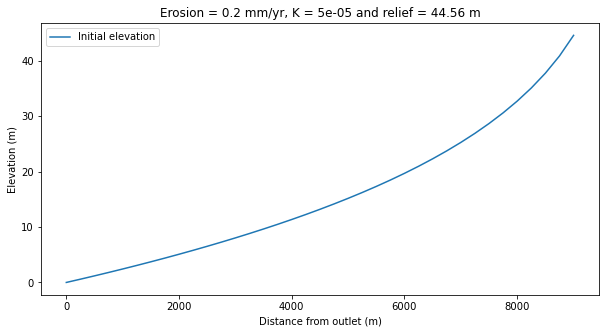

In [3]:
# SET THE BELOW NUMBERS TO THE NUMBERS YOU GOT FROM GOOGLE EARTH
erosion_rate_in_m_per_yr = 0.0002
basin_length_in_metres = 10000

# NOW CHANGE THIS UNTIL THE RELIEF IS THE SAME AS YOU MEASURED IN GOOGLE EARTH
K = 0.00005

relief = plot_channel_SS(K, erosion_rate_in_m_per_yr, basin_length_in_metres)
print("The relief is: " + str(relief))

**WHAT YOU WRITE IN PART 1**

You will write 250 words and have 1-2 figures for this part. 

You should 
1. Write the method for calculating *K*. We know we just told you the method. But you need practise in explaining your methods for your essay. You will need to say how you measured length and relief, where your sites were, how you measured erosion rates (there needs to be a citation or citations) and how the channel profile was calculated (you do not say you used python from Simon, you say instead relief was calculated using the steady state stream power incision model (you could include an equation if you wanted) and there needs to be a reference to a paper. 
2. A comment on the values of *K* you found. Are they all the same? Is there any pattern? A few sentences will do. 
3. A figure or two that support your explanation of the method or that illustrate any trends in K. What these figures look like is up to you. 

Assessment criteria:
* Clarity of writing. Could someone who knows nothing about rivers understand what you did?
* Referencing. I will explain this in class. 
* Figures. Do they have a caption? Do they have scale bars? Do they help understand the text? Can they be understood without the text?

### Part 2: Transient channel behaviour

In part 1 you tuned *K* in a few places to get a sense for how it varies. 

In this part you are going to use those numbers to get a sense of how channels respond to a change in uplift. 
In part 1 we assumed erosion and uplift were the same (this is called a steady state assumption). In this part we exchange uplift for erosion rate (so the initial_U is the same as the erosion rate you used in part 1). 

You will do this by changing parameters in the code block below. 
By changing the parameters you can explore a number of questions. You just need to pick one or two (you can choose more if you really want to) areas to explore and then write your findings and add some figures. 

* Change the uplift rate: how long does it take for the knickpoint to move through the landscape (to the top of the river profile)? Does this time change if the uplift rate is even greater? 
* Change the erodibility coefficient *K*: how long does it take for the knickpoint to move through the landscape (to the top of the river profile)? Does this time change if you change K? What is the significance of this result?
* Does the knickpoint migration rate change, as the knickpoint moves upstream, or is it moving at the same rate all along?


K is: 5e-05
U is: 0.0001
U is: 0.0002

Saving this timestep: 0.0
Time is: 5000.0 
Saving this timestep: 10000.0
Time is: 15000.0 
Saving this timestep: 20000.0
Time is: 25000.0 
Saving this timestep: 30000.0
Time is: 35000.0 
Saving this timestep: 40000.0
Time is: 45000.0 
Saving this timestep: 50000.0
Time is: 55000.0 
Saving this timestep: 60000.0
Time is: 65000.0 
Saving this timestep: 70000.0
Time is: 70000.0 

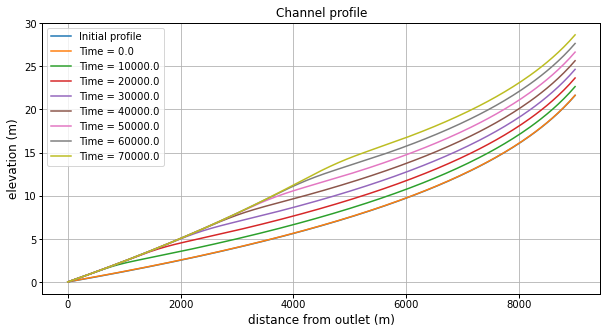

In [7]:
##
## IF YOU WANT TO CHANGE THE PLOT
## Change these parameters
##

## The parameters for a given basin. This sets the initial profile, which is at steady state
basin_length = 10000
initial_U = 0.0001
this_K = 0.00005

## Change the uplift rate
new_U = 0.0002

## These control how many profiles you see on the figure. 
## the names should be self-explanitory
print_every_this_many_years = 10000
last_year_your_print_a_profile = 70000

## We will talk about this a bit in the practical in week 3: chi plots make it easier to see the knickpoint but 
## harder to understand conceptually. Unless you have read and understand lesson_06 keep this False 
do_you_want_to_plot_in_chi_space = False  # True or False


## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
## DO NOT CHANGE ANYTHING BELOW THIS LINE
## !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# create a channel
chan = ct.channeltoy(spacing=50, U = initial_U, K = 0.00005, n=1, m= 0.45,maximum_x = basin_length-999, X_0 = basin_length)
initial_elevation = chan.solve_steady_state_elevation()

# change the uplift rate
chan.set_U_values(U = new_U)

# Run the transient simulation. You can use the start and end time to 
times, elevations = chan.transient_simulation(base_level = 0, dt = 200, 
                                              start_time = 0, end_time = last_year_your_print_a_profile+1, 
                                              print_interval = print_every_this_many_years)

# Make a plot of the elevations
# If you set use_chi=True then you get the chi profiles. 
chan.plot_transient_channel(times = times, 
                            elevations = elevations, 
                            initial_elevation = initial_elevation,
                            show_figure=True,print_to_file=False,use_chi = do_you_want_to_plot_in_chi_space)

**What you do for part 2**:

The word count for this part should be no more than 500 words (figure captions and references do not count). 
There can be up to 3 figures. 

* Explain briefly what you have done. Again do not say you used python and cite the lecture. Instead say you used stream power (with a citation to a paper), you started at steady state, and you then modified something (which will depend on what you looked at). 
* Then, you should write a few paragraphs about your findings. This should look like a small discussion section in a paper. Start with a few sentences explaining what you are simulating (that is, don't assume the reader already knows everything about knickpoints and channels). 
* Use 1-3 figures to explain what you found. 

Assessment criteria:
* Clarity of writing (again, it should be clear what numerical experiments you did). 
* Focus: do not try to cover everything about knickpoint behaviour. Focus on one of the questions we asked in the previous text box. 
* References: you need a handful to set context (see below). 
* Figures: The figures should be in the format of a scientific paper: use figure captions instead of titles. Do they help understand the text? Can they be understood without the text?

## Helpful references 

These references can help your discussion.
**For this assessment, We are more interested in you practising referencing than evidence you read widely. So you will not be marked down if you reference only a subset of these papers (but you will need to reference a few).**

(Note: we do expect you to read more papers for the essay assignment due at the end of term). 

 
**The erosion rate dataset you use in part 1**
Codilean, A.T., Munack, H., Cohen, T.J., Saktura, W.M., Gray, A., Mudd, S.M., 2018. OCTOPUS: an open cosmogenic isotope and luminescence database. Earth Syst. Sci. Data 10, 2123–2139. https://doi.org/10.5194/essd-10-2123-2018
 
 
**First paper with the stream power law**

Howard, A.D., Kerby, G., 1983. Channel changes in badlands. Geological Society of America Bulletin 94, 739–752. https://doi.org/10.1130/0016-7606(1983)94<739:CCIB>2.0.CO;2

**An incredibly detailed paper about the stream power law (warning: lots of maths. Focus on the figures)**

Whipple, K.X., Tucker, G.E., 1999. Dynamics of the stream-power river incision model: Implications for height limits of mountain ranges, landscape response timescales, and research needs. Journal of Geophysical Research: Solid Earth 104, 17661–17674. https://doi.org/10.1029/1999JB900120

**A less mathsy explanation of how river profile geometry can be linked to tectonics**

Kirby, E., Whipple, K.X., 2012. Expression of active tectonics in erosional landscapes. Journal of Structural Geology 44, 54–75. https://doi.org/10.1016/j.jsg.2012.07.009


**First mention of steady state**

Hack, J.T., 1960. Interpretation of erosional topography in humid temperate regions. American Journal of Science 258, 80–97.


**Papers with discussion about how knickpoints move**

Crosby, B.T., Whipple, K.X., 2006. Knickpoint initiation and distribution within fluvial networks: 236 waterfalls in the Waipaoa River, North Island, New Zealand. Geomorphology 82, 16–38. https://doi.org/10.1016/j.geomorph.2005.08.023

Wobus, C.W., Crosby, B.T., Whipple, K.X., 2006. Hanging valleys in fluvial systems: Controls on occurrence and implications for landscape evolution. Journal of Geophysical Research: Earth Surface 111. https://doi.org/10.1029/2005JF000406

Bishop, P., Hoey, T.B., Jansen, J.D., Artza, I.L., 2005. Knickpoint recession rate and catchment area: the case of uplifted rivers in Eastern Scotland. Earth Surface Processes and Landforms 30, 767–778. https://doi.org/10.1002/esp.1191

Mitchell, N.A., Yanites, B.J., 2019. Spatially Variable Increase in Rock Uplift in the Northern U.S. Cordillera Recorded in the Distribution of River Knickpoints and Incision Depths. Journal of Geophysical Research: Earth Surface 124, 1238–1260. https://doi.org/10.1029/2018JF004880


**Values of the K parameter**

Harel, M.-A., Mudd, S.M., Attal, M., 2016. Global analysis of the stream power law parameters based on worldwide 10Be denudation rates. Geomorphology 268, 184–196. https://doi.org/10.1016/j.geomorph.2016.05.035

